# **Understanding Datalog: A Theoretical Overview**

Datalog is a declarative logic programming language designed for querying relational databases. It is based on Prolog, but lacks complicated features such as built-in predicates and arithmetic. Datalog's simplicity makes it more adaptable to optimisations and a powerful tool for efficiently managing huge databases.

## **Environment Preparation**

First, we need to install pyDatalog to use Datalog capabilities in Python.

In [ ]:
!pip install pyDatalog

## **Core Concepts of Datalog**
### **1. Facts and Rules:**

*   Facts are simple assertions regarding data, such as Knows(Alice, Bob), which declares that Alice knows Bob.

*   Rules are logical expressions that deduce new facts from known ones. For example, a rule could establish friendships based on shared knowledge: Friend (X and Y):- Knows(X, Y); Knows(Y, X).


In [ ]:
from pyDatalog import pyDatalog
pyDatalog.create_terms('X, Y, Z, Knows, Friend')

# To define facts
+ Knows('Alice', 'Bob')
+ Knows('Bob', 'Alice')
+ Knows('Alice', 'Charlie')
+ Knows('Charlie', 'Alice')

# To define a rule
Friend(X, Y) <= Knows(X, Y) & Knows(Y, X)

# To find all friends
print(Friend(X, Y))

This code block presents basic facts and rules. The "Knows" fact refers to a relationship in which one person knows another. The "Friend" rule then applies these facts to derive new information: two persons are friends if they know each other. The query returns all pairings that satisfy the Friend relationship.

### **2. Schema and Database Instance:**

*   A schema in datalog comprises of relation names and their arities (the number of arguments or attributes). For example, Knows/2 denotes a relation named 'Knows' that has two properties.

*   A database instance is a collection of facts that represents the schema.



In [ ]:
# To add more facts
+ Knows('Alice', 'Dan')

# To check new knowledge addition
print(Knows(X, Y))

This section should introduce a new fact. The database instance is expanded, but the schema remains unchanged.

### **3. EDB and IDB Predicates:**

*   The EDB (Extensional Database) predicates are those that are explicitly defined by database facts. They represent data that has been stored.

*   IDB (Intentional Database) predicates are governed by rules. They represent derived data that does not appear directly in the database.


In [ ]:
# EDB predicates
+ Knows('Dan', 'Erin')

# IDB predicate
Friend(X, Y) <= Knows(X, Y) & Knows(Y, X)

# EDB and IDB outputs
print("EDB Output -")
print(Knows(X, Y))
print()
print("IDB Output -")
print(Friend(X, Y))

This code illustrates the difference between EDB and IDB predicates. EDB is data that may be extracted directly from facts, but IDB is the product of logical deductions (rules applied to EDB facts).


## **Syntax and Semantics**

Datalog's syntax is straightforward, consisting of a set of rules and facts. The semantics of Datalog are based on the concept of least fixpoint semantics, in which the results of queries are the smallest set of facts that meet all rules.

### **1. Rule Structure:**

*   A typical Datalog rule consists of a head and a body: Head:- Body.

*   The head comprises a single predicate that is formed from the predicates in the body using logical conjunctions (AND operations), which may include negations.

### **2. Safety Requirement:**

*   A rule is considered safe if every variable in its head is represented by a non-negated predicate in the body. This criterion ensures that the rule does not try to deduce facts from undefined attributes.





In [ ]:
# To define a rule
Friend(X, Y) <= Knows(X, Y) & Knows(Y, X)

## **Stratified Negation**
Datalog supports negation, but it employs stratified negation to maintain consistency and avoid inconsistencies (such as the famed "Russell's paradox").

### **1. Stratification:**

*   A Datalog program is stratified if it can be separated into layers or strata, with predicates in one layer fully evaluated before moving on to the next.

*   A predicate can only negatively refer to another predicate if it has been thoroughly evaluated in a previous stratum. This assures that there are no cyclic dependencies with negations.

### **2. Execution:**
*   The program examines each stratum in order, guaranteeing that each layer's computation is based on a complete and consistent set of data from the preceding layers.

In [ ]:
pyDatalog.create_terms('Not_Friend, Person')

# To introduce negation in the rules
Not_Friend(X, Y) <= Person(X) & Person(Y) & ~(Friend(X, Y))
Person(X) <= Knows(X, Y)

# To ensure all people are defined as Persons based on who they know
+ Person('Alice')
+ Person('Bob')
+ Person('Charlie')
+ Person('Dan')

# To find those who are not friends
print(Not_Friend(X, Y))

The term "Not_Friend" is defined using stratified negation, which identifies people who are not friends despite knowing them. It provides logical consistency by analysing in a layered manner—first selecting individuals, then applying friendship logic, and then evaluating non-friendship relationships.

## **Program Dependency Graph**

In a Datalog program, the Program Dependency Graph (PDG) is a directed graph with vertices representing intensional database (IDB) predicates. Edges represent dependencies: an edge from "H" to "P" exists if "P" is an IDB predicate in the body of a rule with "H" as the head. If "P" appears under negation, the edge is labelled with a "−". A Datalog programme is stratified, or free of computational cycles that involve negation, if its PDG has no directed cycles with negatively labelled edges.

Here is the Program Dependency Graph of our Database -
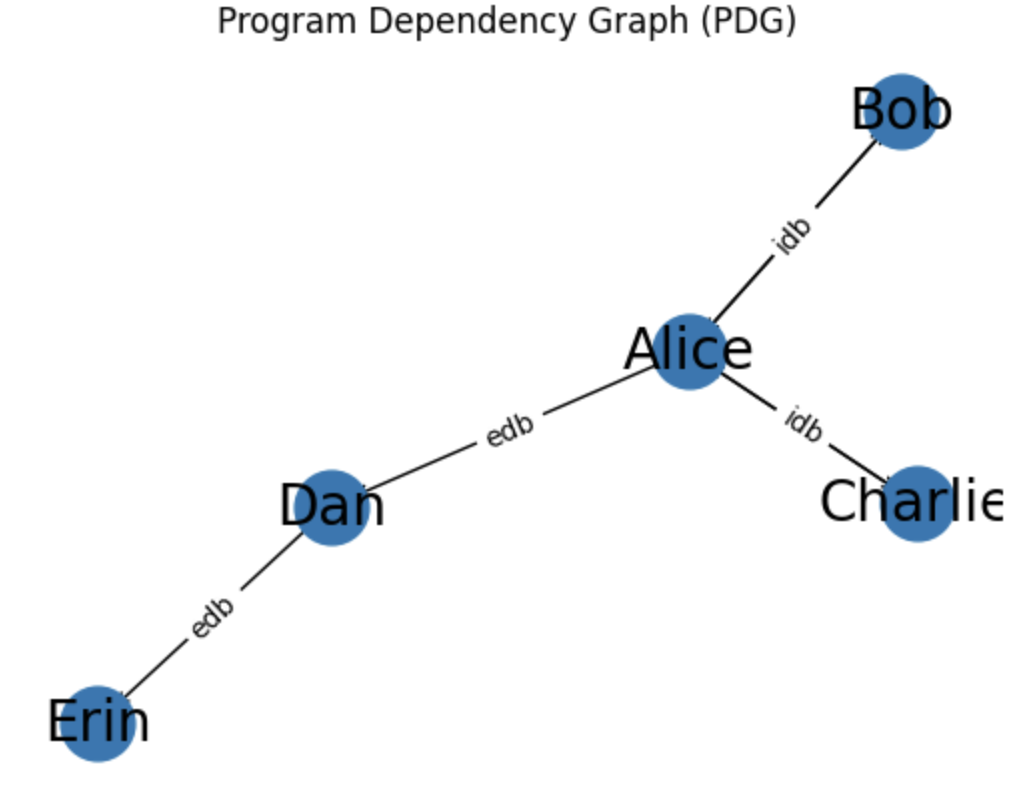

## **Applications of Datalog**

Datalog is widely used in domains that need complicated queries over relational data, including:

**1. Database Queries:** Its recursive characteristics make it appropriate for query types that are difficult to define in SQL, such as transitive closure.

**2. Knowledge Representation:** Datalog's logical underpinning makes it ideal for use in artificial intelligence and knowledge-based systems.

**3. Security:** Datalog is used to define security policies and protocols, and its declarative nature ensures clarity and consistency.



## **Conclusion**

Congratulations on completing our in-depth tutorial of Datalog in a hands-on, interactive setting. This Google Collab tutorial has not only taught you about Datalog's syntax and semantics, but you've also seen firsthand the elegance and logical depth this language provides for accessing and managing relational databases. We began with the fundamentals—defining simple relationships—and progressed to more complicated structures such as stratified negation, demonstrating Datalog's ability to handle intricate logical queries efficiently.

This journey provided you the tools you need to think logically and structurally about data relationships, with a focus on clarity and precision in rule-based data manipulation. The exercises demonstrated how Datalog can speed complex queries including recursive relationships and conditional logic, making it a valuable tool for any data professional or researcher.

As you continue to improve your data querying skills, keep in mind Datalog's fundamental ideas and the methodical approach to problem solving that it encourages. Whether you're working with enormous datasets or complex data structures, the techniques covered here will help you create more efficient and trustworthy database searches. Continue experimenting with different scenarios and incorporating Datalog ideas into your projects to fully realise the potential of this strong logic programming language. Thank you for joining me on this educational voyage; may your future efforts be smart and data-driven!